In [1]:
from zipfile import ZipFile
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras import models
from keras import layers
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
import keras
from keras.layers import Conv2D, MaxPooling2D,Flatten
np.random.seed(107629491)
minibatch = 200
epochs = 50

class LoadDataModule(object):
    def __init__(self):
        self.DIR = './'
        pass
    
    # Returns images and labels corresponding for training and testing. Default mode is train. 
    # For retrieving test data pass mode as 'test' in function call.
    def load(self, mode = 'train'):
        label_filename = mode + '_labels'
        image_filename = mode + '_images'
        label_zip = self.DIR + label_filename + '.zip'
        image_zip = self.DIR + image_filename + '.zip'
        with ZipFile(label_zip, 'r') as lblzip:
            labels = np.frombuffer(lblzip.read(label_filename), dtype=np.uint8, offset=8)
        with ZipFile(image_zip, 'r') as imgzip:
            images = np.frombuffer(imgzip.read(image_filename), dtype=np.uint8, offset=16).reshape(len(labels), 784)
        print(images,labels)
        return images, labels
ld = LoadDataModule()
images,labels = ld.load('train')
plt.imshow(np.reshape(images[0,:],(28,28)))

C:\Users\srinivab\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] [9 0 0 ... 3 0 5]


In [2]:
train_x = images[:48000]
test_x = images[48000:]
target_train_y = labels[:48000]
target_test_y = labels[48000:]

train_x = train_x.astype('float32')
test_x = test_x.astype('float32')
train_x = train_x / 255
test_x = test_x / 255

train_y = to_categorical(target_train_y)
test_y = to_categorical(target_test_y)

img_rows=28
img_cols = 28

cnn_model = models.Sequential()
cnn_model.add(Conv2D(48, kernel_size=(3, 3),activation='relu',input_shape=(img_rows,img_cols,1),padding='valid',strides=(1, 1)))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(96, kernel_size=(3, 3),activation='relu',input_shape=(img_rows,img_cols,1),padding='valid',strides=(1, 1)))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Flatten())
cnn_model.add(layers.Dense(100, activation = "relu"))
cnn_model.add(layers.Dense(10, activation = "softmax"))
cnn_model.summary()

train_x = train_x.reshape(train_x.shape[0], img_rows, img_cols, 1)
test_x = test_x.reshape(test_x.shape[0], img_rows, img_cols, 1)

# from keras.utils import plot_model
# plot_model(cnn_model, to_file='model_plot_BigCNN.png', show_shapes=True, show_layer_names=True)
# from IPython.display import Image,SVG
# Image(filename='model_plot_smallCNN.png')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 48)        480       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 96)        41568     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 96)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2400)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               240100    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total para

Train on 38400 samples, validate on 9600 samples
Epoch 1/50
38400/38400 [==============================] - 80s 2ms/step - loss: 0.6470 - acc: 0.7694 - val_loss: 0.4468 - val_acc: 0.8439
Epoch 2/50
38400/38400 [==============================] - 80s 2ms/step - loss: 0.4035 - acc: 0.8545 - val_loss: 0.3650 - val_acc: 0.8678
Epoch 3/50
38400/38400 [==============================] - 80s 2ms/step - loss: 0.3484 - acc: 0.8754 - val_loss: 0.3428 - val_acc: 0.8754
Epoch 4/50
38400/38400 [==============================] - 81s 2ms/step - loss: 0.3124 - acc: 0.8873 - val_loss: 0.3146 - val_acc: 0.8896
Epoch 5/50
38400/38400 [==============================] - 81s 2ms/step - loss: 0.2914 - acc: 0.8946 - val_loss: 0.3043 - val_acc: 0.8907
Epoch 6/50
38400/38400 [==============================] - 80s 2ms/step - loss: 0.2731 - acc: 0.9005 - val_loss: 0.2888 - val_acc: 0.8956
Epoch 7/50
38400/38400 [==============================] - 80s 2ms/step - loss: 0.2511 - acc: 0.9092 - val_loss: 0.2851 - val_acc:

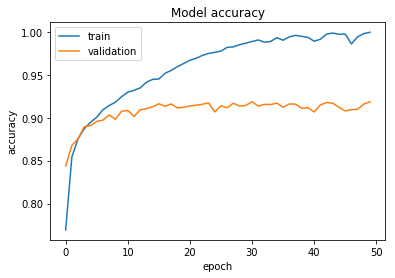

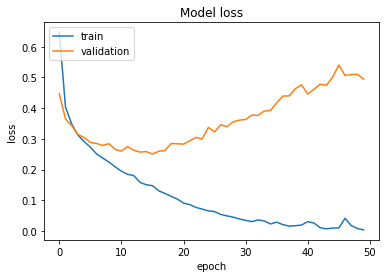

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] [9 2 1 ... 8 1 5]
             precision    recall  f1-score   support

          0       0.86      0.83      0.85      1000
          1       0.99      0.97      0.98      1000
          2       0.86      0.87      0.87      1000
          3       0.91      0.91      0.91      1000
          4       0.84      0.90      0.87      1000
          5       0.98      0.97      0.98      1000
          6       0.75      0.72      0.73      1000
          7       0.95      0.98      0.96      1000
          8       0.97      0.98      0.97      1000
          9       0.98      0.96      0.97      1000

avg / total       0.91      0.91      0.91     10000

[[829   0  18  16   6   1 119   0  11   0]
 [  3 975   1  12   4   0   3   0   2   0]
 [ 14   1 870   8  44   0  62   0   1   0]
 [ 18   6  11 909  27   0  25   0   3   1]
 [  5   1  39  18 903   0  33   1   0   0]
 [  0   

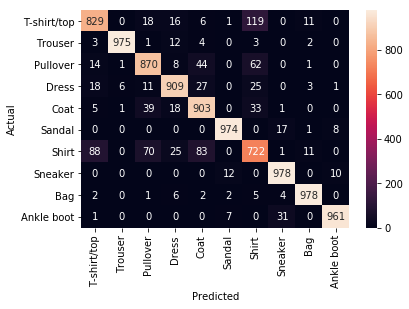

In [3]:
#tensor_board =TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)
import time
t = time.localtime(time.time())
timeStamp = str(t.tm_year) + '-' + str(t.tm_mon) + '-' + str(t.tm_mday) + '--' + str(t.tm_hour) + '-'+str(t.tm_min) + '-'+str(t.tm_sec)
tBoard = TensorBoard(log_dir='logs/{}'.format(timeStamp))
cnn_model.compile(
 optimizer = "adam",
 #loss = "categorical_crossentropy",
 loss = "sparse_categorical_crossentropy",
 metrics = ["accuracy"]
)
cnn_result = cnn_model.fit(train_x,target_train_y,
                   batch_size=minibatch,
                   epochs=epochs,
                   validation_split = 0.2,
                   shuffle=True,
                   callbacks=[tBoard])

print(cnn_result.history.keys())
# summarize history for accuracy
plt.plot(cnn_result.history['acc'])
plt.plot(cnn_result.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(cnn_result.history['loss'])
plt.plot(cnn_result.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

test_result = cnn_model.evaluate(test_x,target_test_y, verbose=0)

images,labels = ld.load('test')
test_x = images
test_x = test_x.reshape(test_x.shape[0], img_rows, img_cols, 1)
target_test_y = labels
test_x = test_x.astype('float32')
test_x = test_x / 255
test_y = to_categorical(target_test_y)

y_pred = cnn_model.predict(test_x)
y_pred = np.argmax(np.round(y_pred),axis=1)
from sklearn.metrics import classification_report
print(classification_report(target_test_y, y_pred))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(target_test_y, y_pred)
print(cm)
y_classes = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d',xticklabels=y_classes, yticklabels=y_classes)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()